# Morphological Operations

Fundamentally morphological image processing is similar to spatial filtering. The structuring element is moved across every pixel in the original image to give a pixel in a new processed image. The value of this new pixel depends on the morphological operation performed. Morphological operations are simple transformations applied to binary or grayscale images. More specifically, we apply morphological operations to shapes and structures inside of images. 

## Erosion

Erosion is a morphological operaition where we erode the boundary area of foregrounrd pixels.Erosion operation shrinks the areas of th foreground pixels.Using erosion, we can eliminate the narrow regions and make thin the wider ones.Erosion works by defining a structuring element and then sliding this structuring element from left-to-right and top-to-bottom across the input image.

A foreground pixel in the input image will be kept only if all pixels inside the structuring element are > 0. Otherwise, the pixels are set to 0 (i.e., background).

Erosion is useful for removing small blobs in an image or disconnecting two connected objects.

In [1]:
# importing important libraries
import cv2
import matplotlib.pyplot as plt


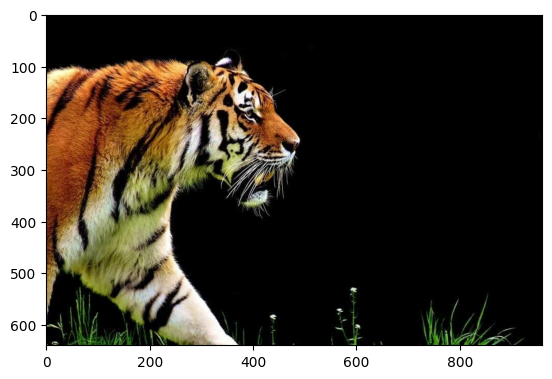

In [4]:
# Load images 
image_path = '../dataset/tiger.jpg'
image = cv2.imread(image_path)

# display image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [13]:
# Plotting images
def plot_two_images(image, new_image,title1, title2):
    """
    Plot two Images

    Parameters
    ----------
    image:  Image or numpy.ndarray
        First Image to be plotted.
    new_image: a number or float or int 
        Second Image to be plotted.
    title1: text or string  
        Title for First Image
    title2: text or string
        Title for second Image
    """
    f, axes = plt.subplots(1, 2 , figsize=(10,8))
    axes[0].imshow(image,cmap='gray')
    axes[1].imshow(new_image,cmap='gray')
    plt.setp(axes[0], xlabel=title1)
    plt.setp(axes[1], xlabel=title2)
    f.tight_layout()
    plt.show()

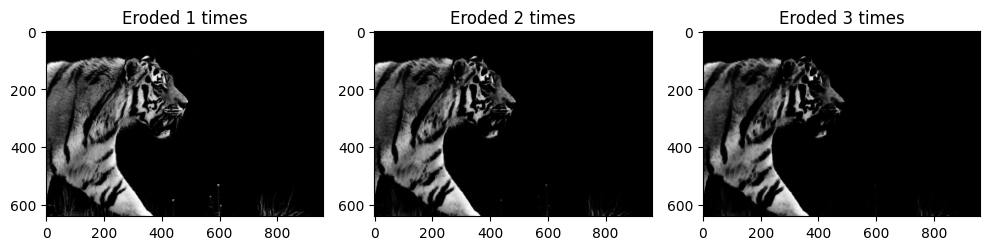

In [24]:
# Load your grayscale image here
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a figure to display images
plt.figure(figsize=(10, 5))

for i in range(0, 3):
    eroded = cv2.erode(gray, None, iterations=i + 1)
    plt.subplot(1, 3, i + 1)
    plt.imshow(eroded, cmap='gray')
    plt.title("Eroded {} times".format(i + 1))

plt.tight_layout()
plt.show()

    

 Notice as the number of erosion iterations increases, more and more of the Tiger eaten away.
 .

## Dilation

Dilation is just the opposite process of erosion operation. If erosion decreases the size of the image, dilation increases the image size. It only enlarges the boundary regions of the foreground pixels. One of its uses is to bridge the gap in a picture as it is an expansion operator that enlarges the image.

The opposite of an erosion is a dilation. Just like an erosion will eat away at the foreground pixels, a dilation will grow the foreground pixels.

Dilations increase the size of foreground objects and are especially useful for joining broken parts of an image together.


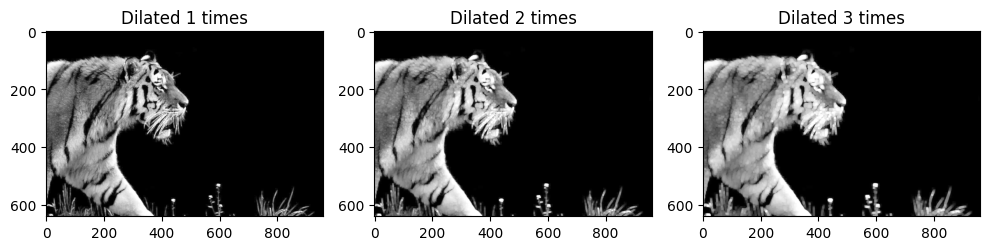

In [23]:
# Create a figure to display images
plt.figure(figsize=(10, 5))

for i in range(0, 3):
    eroded = cv2.dilate(gray, None, iterations=i + 1)
    plt.subplot(1, 3, i + 1)
    plt.imshow(eroded, cmap='gray')
    plt.title("Dilated {} times".format(i + 1))

plt.tight_layout()
plt.show()

An erosion where the foreground region is slowly eaten away at, a dilation actually grows our foreground region.

## Opening

An opening is the compounded morphological operation derived from the fundamental operations erosion and dilation. Opening somewhat behaves like erosion but less destructive. Here, you remove some foreground pixels from the boundary region of the image. An opening is a process in which erosion operation follows the dilation.

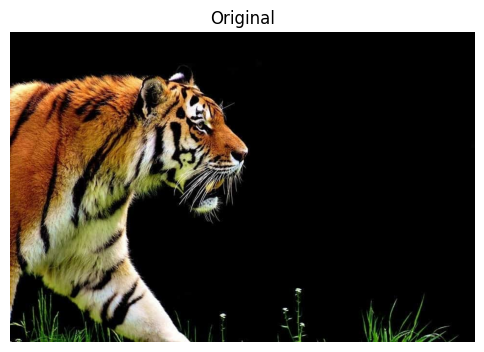

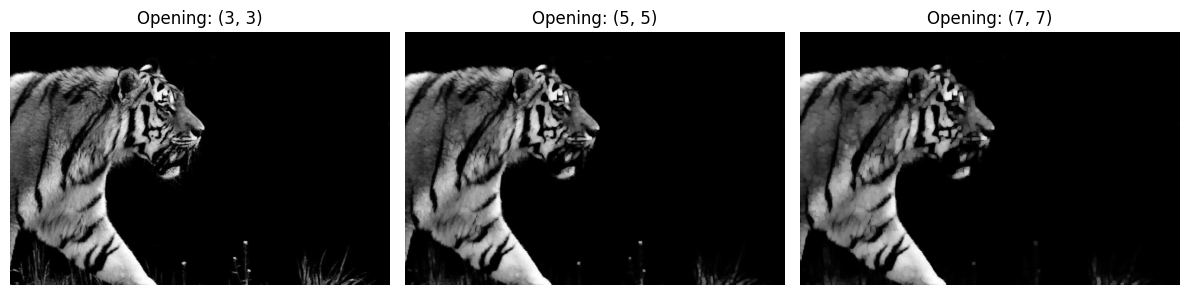

In [25]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Display the original image using Matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.show()

kernelSizes = [(3, 3), (5, 5), (7, 7)]

# Create a figure to display images
plt.figure(figsize=(12, 4))

for kernelSize in kernelSizes:
    # Construct a rectangular kernel from the current size
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    
    # Apply an "opening" operation
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    
    # Display the result using Matplotlib
    plt.subplot(1, len(kernelSizes), kernelSizes.index(kernelSize) + 1)
    plt.imshow(opening, cmap='gray')
    plt.title("Opening: ({}, {})".format(kernelSize[0], kernelSize[1]))
    plt.axis('off')

plt.tight_layout()
plt.show()


## Closing

Closing is the dual of the opening process. It is the composite operation derived from fundamental operations erosion and dilation. It is similar to dilation in some manner as it tends to increase the boundary of the foreground regions in an image. It is the reverse process of opening. A closing is a dilation followed by an erosion.

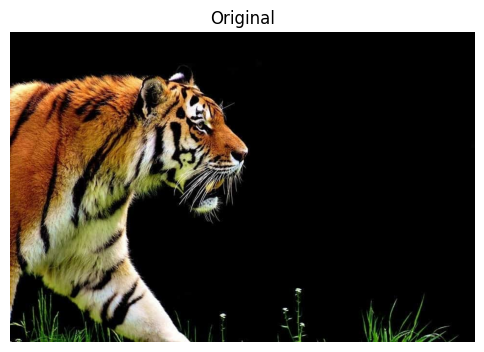

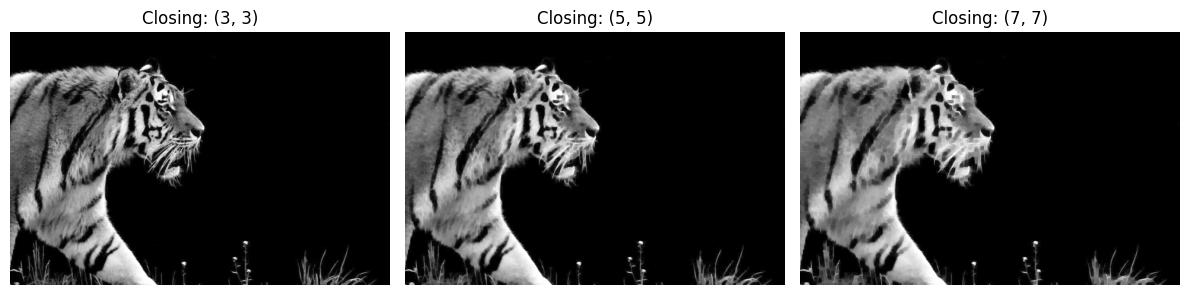

In [26]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Display the original image using Matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.show()

kernelSizes = [(3, 3), (5, 5), (7, 7)]

# Create a figure to display images
plt.figure(figsize=(12, 4))

for kernelSize in kernelSizes:
    # Construct a rectangular kernel from the current size
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    
    # Apply a "closing" operation
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    
    # Display the result using Matplotlib
    plt.subplot(1, len(kernelSizes), kernelSizes.index(kernelSize) + 1)
    plt.imshow(closing, cmap='gray')
    plt.title("Closing: ({}, {})".format(kernelSize[0], kernelSize[1]))
    plt.axis('off')

plt.tight_layout()
plt.show()


## Morphological gradient
A morphological gradient is the difference between a dilation and erosion. It is useful for determining the outline of a particular object of an image.

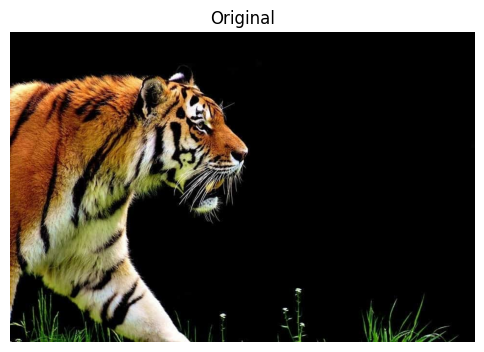

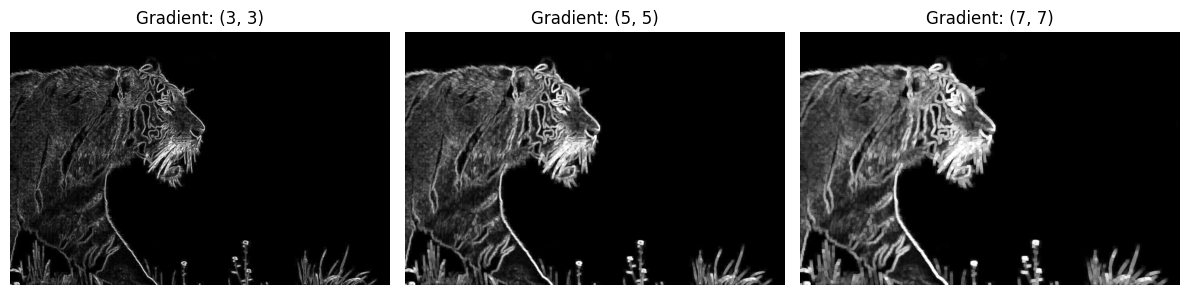

In [27]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original image using Matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.show()

kernelSizes = [(3, 3), (5, 5), (7, 7)]

# Create a figure to display images
plt.figure(figsize=(12, 4))

for kernelSize in kernelSizes:
    # Construct a rectangular kernel from the current size
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    
    # Apply a "morphological gradient" operation
    gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
    
    # Display the result using Matplotlib
    plt.subplot(1, len(kernelSizes), kernelSizes.index(kernelSize) + 1)
    plt.imshow(gradient, cmap='gray')
    plt.title("Gradient: ({}, {})".format(kernelSize[0], kernelSize[1]))
    plt.axis('off')

plt.tight_layout()
plt.show()


## Top hat/white hat and black hat

A top hat (also known as a white hat) morphological operation is the difference between the original (grayscale/single channel) input image and the opening.

A top hat operation is used to reveal bright regions of an image on dark backgrounds.In fact, both the top hat/white hat and the black hat operators are more suited for grayscale images rather than binary ones.

In [28]:
# load the image and convert it to grayscale
image_path = '../dataset/car.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# construct a rectangular kernel (13x5) and apply a blackhat
# operation which enables us to find dark regions on a light
# background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

# similarly, a tophat (also called a "whitehat") operation will
# enable us to find light regions on a dark background
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

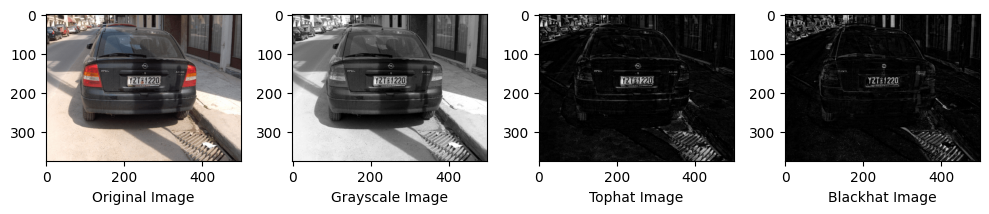

In [37]:
f, axes = plt.subplots(1, 4 , figsize=(10,8))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1].imshow(gray,cmap ='gray')
axes[2].imshow(tophat, cmap = 'gray')
axes[3].imshow(blackhat,cmap = 'gray')

plt.setp(axes[0], xlabel= "Original Image")
plt.setp(axes[1], xlabel= "Grayscale Image")
plt.setp(axes[2], xlabel= "Tophat Image")
plt.setp(axes[3], xlabel= "Blackhat Image")

f.tight_layout()
plt.show()

To reveal our license plate characters we first segment out the license plate itself via a top hat operator and then apply a black hat operator (or thresholding) to extract the individual license plate characters